# Food Supply and Its Impact on Country's GDP
By: Shangyan Duan, Ziyuan Mao

## 1. Objective of the Proposed Research

A country's GDP reflects the developments and abilities of a country. By looking at the GDP, we can generate a big picture of how this country performs compared to others in the world. The dataset in this research is from Our World in Data on Food Supply. It provides relative information on food supply and GDP in 200 countries.

Our objective for this research is to analyze the relationship of a citizen's daily caloric, protein, fat, and food supply on a country's GDP. We want to know whether the intake of calories, protein, etc. impacts a country's GDP. Also, we like to analyze which variable is more important to each country's GDP.

The food consumption of citizens plays a part in the increase and decrease in GDP. People in low-income countries might have smaller contributions in fats and have the same protein supply as high-income countries. By exploring this data, we hope to provide insights for the government and the public to help them see that food supply and consumption will change in the corresponding direction whenever economic growth occurs. Hopefully, the signs of an increase in food consumption will help the government make the right economic decisions in the future.

## 2. Data Exploration

The first thing we need to do is to import the CVS file. By using ```read.csv()```.After that, using ```head()``` to check the first several rows of a matrix or data frame. For this data, we print out the **first ten rows**.

In [2]:
food <- read.csv(file = "food gdp.csv")
head(food, 10)

Area,Code,Year,ASP,DCS,DFS,DPS,MFS,Population,GDP,CV,GDP.per.capita
Afghanistan,AFG,2013,2.44,2090,33.52,58.25,12.33,32270000,20170,0.25,1849.00
Africa,,2013,11.79,2624,54.46,69.10,19.01,1123044992,NA,NA,NA
Albania,ALB,2013,5.39,3193,106.53,111.42,61.96,2904000,12784,NA,9945.86
Algeria,DZA,2013,8.33,3296,76.55,91.96,21.07,38140000,209755,0.28,13293.02
Americas,,2013,9.15,NA,119.14,93.25,86.94,56000,NA,NA,NA
Angola,AGO,2013,8.96,2473,53.54,57.26,36.13,26016000,136710,0.30,7691.17
Antigua and Barbuda,ATG,2013,2.96,2417,90.03,83.71,85.07,92000,1181,NA,17703.67
Argentina,ARG,2013,0.85,3229,116.46,102.64,107.24,42196000,611471,0.21,16920.76
Armenia,ARM,2013,NA,2928,96.64,90.04,45.71,2898000,11121,0.24,9481.51
Asia,,2013,6.55,2779,72.66,77.57,32.55,NA,NA,NA,NA


we use ```dim()``` to check the dimensions of this data frame, and ```colnames()``` to get the column names.<br>

In [21]:
dim(food)
colnames(food)

[1] 208  12

[1] "Area"           "Code"           "Year"           "ASP"           
 [5] "DCS"            "DFS"            "DPS"            "MFS"           
 [9] "Population"     "GDP"            "CV"             "GDP.per.capita"

Area – Countries<br>
Code - Abbreviation of the country name<br>
Year – 2013<br>
ASP - Average per capita supply of pulses<br>
DCS - Daily caloric supply<br>
DFS – Daily fat supply<br>
DPS - Daily Protein supply<br>
MFS - Meat food supply<br>
Population – Total population<br>
GDP - Gross domestic product <br>
CV - Caloric Coefficient Variation<br>
GDP per capita - Gross domestic product per capita
<br>

From the output above, we get ***208 by 12*** dataframe.

In [3]:
## Look at the summary to see if there are any NA values
summary(food)

          Area          Code          Year           ASP              DCS      
 Afghanistan:  1          : 37   Min.   :2013   Min.   : 0.000   Min.   :1879  
 Africa     :  1   AFG    :  1   1st Qu.:2013   1st Qu.: 2.060   1st Qu.:2536  
 Albania    :  1   AGO    :  1   Median :2013   Median : 5.100   Median :2823  
 Algeria    :  1   ALB    :  1   Mean   :2013   Mean   : 6.842   Mean   :2847  
 Americas   :  1   ARE    :  1   3rd Qu.:2013   3rd Qu.:10.342   3rd Qu.:3182  
 Angola     :  1   ARG    :  1   Max.   :2013   Max.   :36.720   Max.   :3768  
 (Other)    :202   (Other):166                  NA's   :2        NA's   :32    
      DFS              DPS              MFS           Population       
 Min.   : 23.77   Min.   : 37.66   Min.   :  3.69   Min.   :5.000e+04  
 1st Qu.: 59.49   1st Qu.: 64.79   1st Qu.: 24.71   1st Qu.:2.859e+06  
 Median : 83.19   Median : 81.92   Median : 49.42   Median :9.834e+06  
 Mean   : 87.81   Mean   : 81.60   Mean   : 51.03   Mean   :4.811e+07  


In [4]:
quantile(food$DFS, c(.30, .55, .96))

30%      55%      96% 
 63.0480  88.8645 150.9580

I also use ```quantile()``` to get the 0.30, 0.55, and 0.96 percentiles of the numerical values.

## 3. Data Cleaning

In [9]:
## I want to clean out all the NA's except for this last column called Caloric Coefficient.
food1 <- food[complete.cases(food[, 2:10]), ]
summary(food1)

                  Area          Code          Year           ASP        
 Afghanistan        :  1   AFG    :  1   Min.   :2013   Min.   : 0.000  
 Albania            :  1   AGO    :  1   1st Qu.:2013   1st Qu.: 1.988  
 Algeria            :  1   ALB    :  1   Median :2013   Median : 4.885  
 Angola             :  1   ARE    :  1   Mean   :2013   Mean   : 6.677  
 Antigua and Barbuda:  1   ARG    :  1   3rd Qu.:2013   3rd Qu.: 9.625  
 Argentina          :  1   ATG    :  1   Max.   :2013   Max.   :36.240  
 (Other)            :146   (Other):146                                  
      DCS            DFS              DPS              MFS        
 Min.   :1930   Min.   : 23.77   Min.   : 37.66   Min.   :  3.69  
 1st Qu.:2524   1st Qu.: 59.63   1st Qu.: 64.88   1st Qu.: 22.16  
 Median :2842   Median : 84.97   Median : 82.98   Median : 51.21  
 Mean   :2872   Mean   : 87.71   Mean   : 81.70   Mean   : 51.47  
 3rd Qu.:3251   3rd Qu.:110.44   3rd Qu.: 96.25   3rd Qu.: 77.42  
 Max.   :3768 

Caloric coefficient measures the inequality of caloric intake across a given population. Higher CV values represent larger levels of dietary inequality. This column's NA is only applied to some countries, but doesn't affect the overall data.

## 4. Adaptation

In [17]:
library(tidyverse)
## Adding a column that displays GDP per capita for each country.
## Adding a column that converts Meat and Food supply to g/capita/day to match other columns.
food2 <- food1 %>% group_by(GDP, Population, MFS) %>% 
mutate(GDP.per.capita = (GDP/Population)*1000000) %>% 
mutate(Meat.food.supply.quantity.g.capita.day = (MFS * 1000)/365)
head(food2)

Area,Code,Year,ASP,DCS,DFS,DPS,MFS,Population,GDP,CV,GDP.per.capita,Meat.food.supply.quantity.g.capita.day
Afghanistan,AFG,2013,2.44,2090,33.52,58.25,12.33,32270000,20170,0.25,625.0387,33.78082
Albania,ALB,2013,5.39,3193,106.53,111.42,61.96,2904000,12784,NA,4402.2039,169.75342
Algeria,DZA,2013,8.33,3296,76.55,91.96,21.07,38140000,209755,0.28,5499.6067,57.72603
Angola,AGO,2013,8.96,2473,53.54,57.26,36.13,26016000,136710,0.30,5254.8432,98.98630
Antigua and Barbuda,ATG,2013,2.96,2417,90.03,83.71,85.07,92000,1181,NA,12836.9565,233.06849
Argentina,ARG,2013,0.85,3229,116.46,102.64,107.24,42196000,611471,0.21,14491.2077,293.80822


## 5. Descriptive Visualization: 

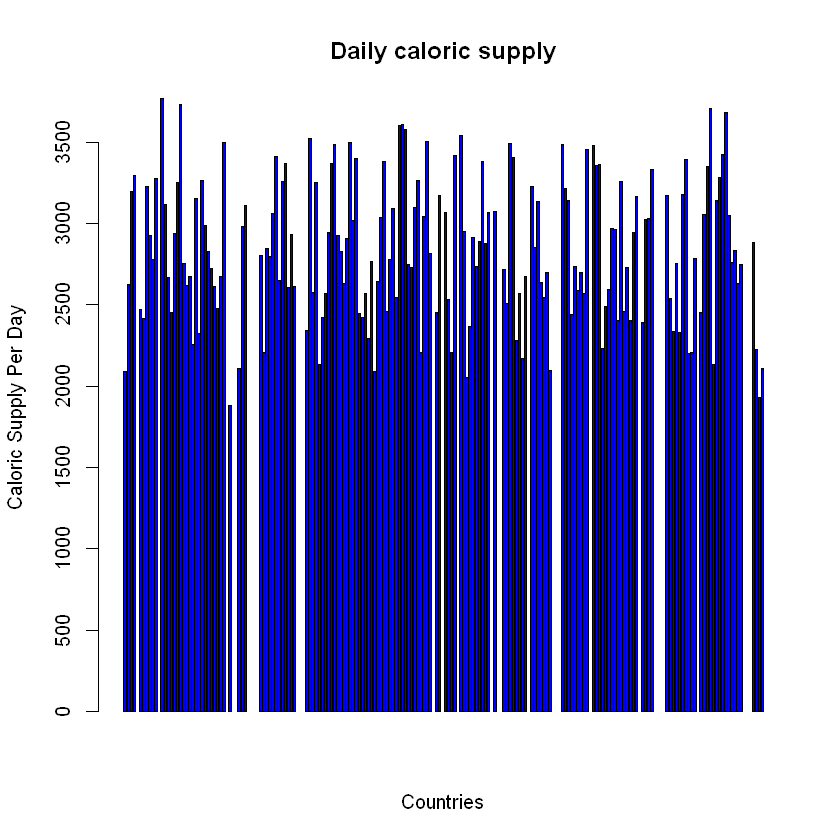

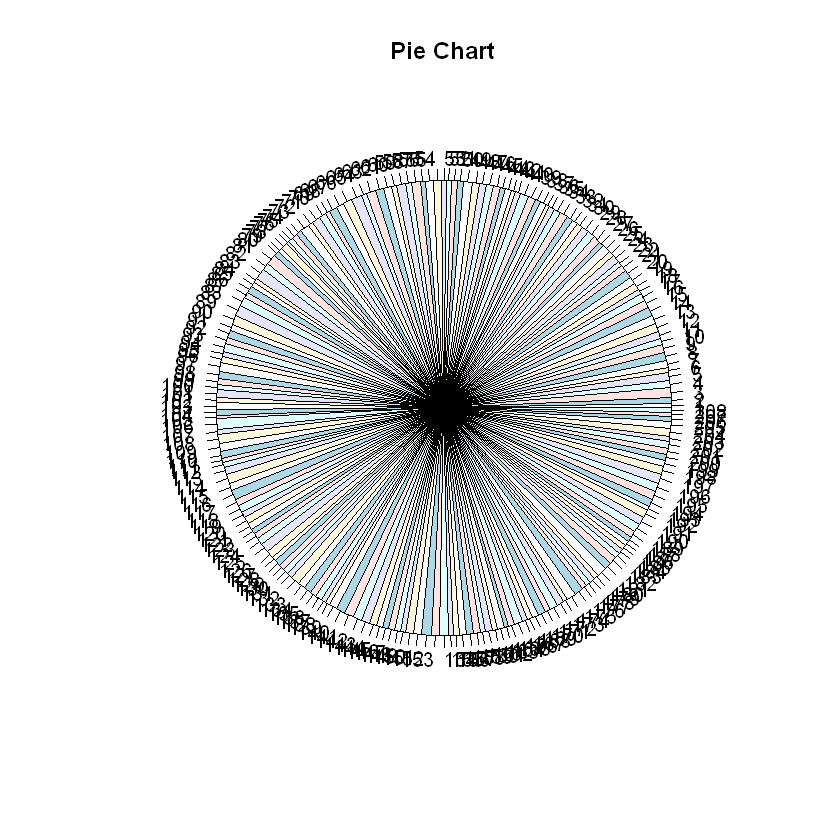

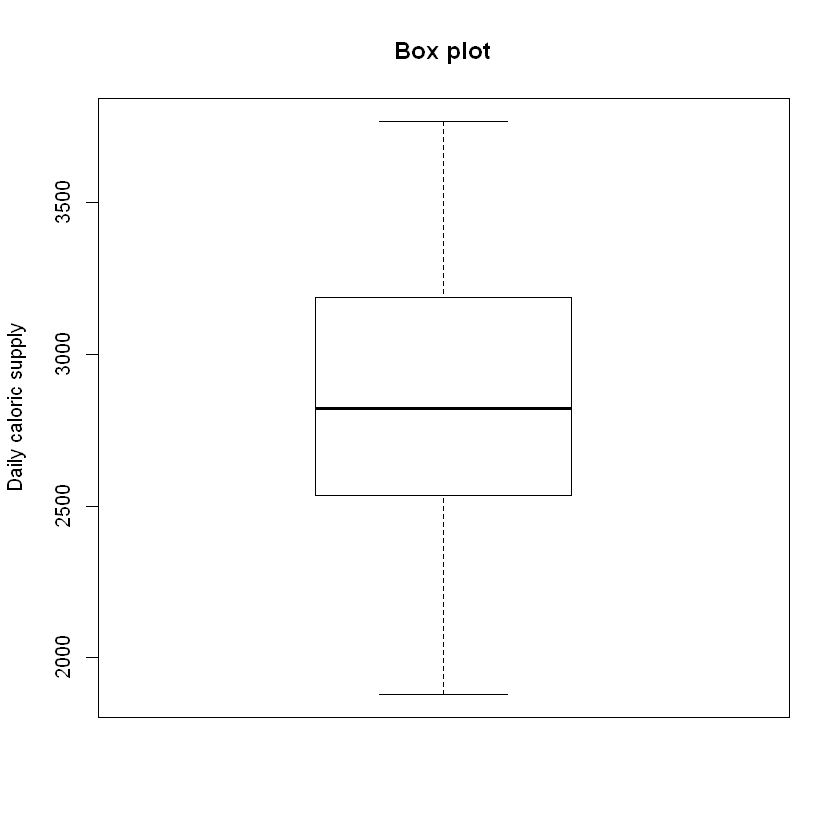

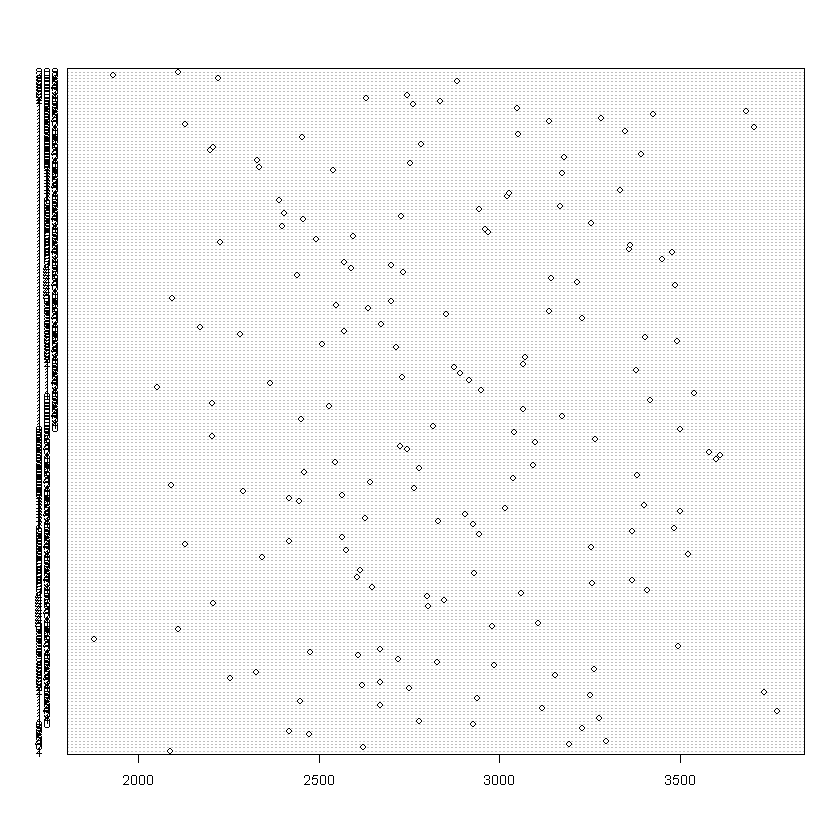

In [32]:
library(plotrix)
#1.
barplot(food$DCS, main = "Daily caloric supply", xlab = "Countries", ylab = "Caloric Supply Per Day", col = "blue")
#2.
pie(food$DPS, main = "Pie Chart")
#3.
boxplot(food$DCS, main = "Box plot", ylab = "Daily caloric supply")
#4.
dotchart(food$DCS, labels = row.names(food), cex = .7)

## Linear Regression

### Explore Correlations, Response Variable, Five Simple Linear Regression

We want to see the relationship between a variable with GDP per capita, so we use **Simple Linear Regression**.

First of all, we want to use the Daily caloric supply to predict GDP per capita，we can get an equation that can help us distinguish the individual, which is too high or too low.


Call:
lm(formula = GDP.per.capita ~ DCS, data = food)

Residuals:
   Min     1Q Median     3Q    Max 
-23836  -7983  -1826   4152  58665 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -56329.687   6529.000  -8.628 6.52e-15 ***
DCS             25.747      2.261  11.386  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 12640 on 157 degrees of freedom
  (49 observations deleted due to missingness)
Multiple R-squared:  0.4523,	Adjusted R-squared:  0.4488 
F-statistic: 129.7 on 1 and 157 DF,  p-value: < 2.2e-16


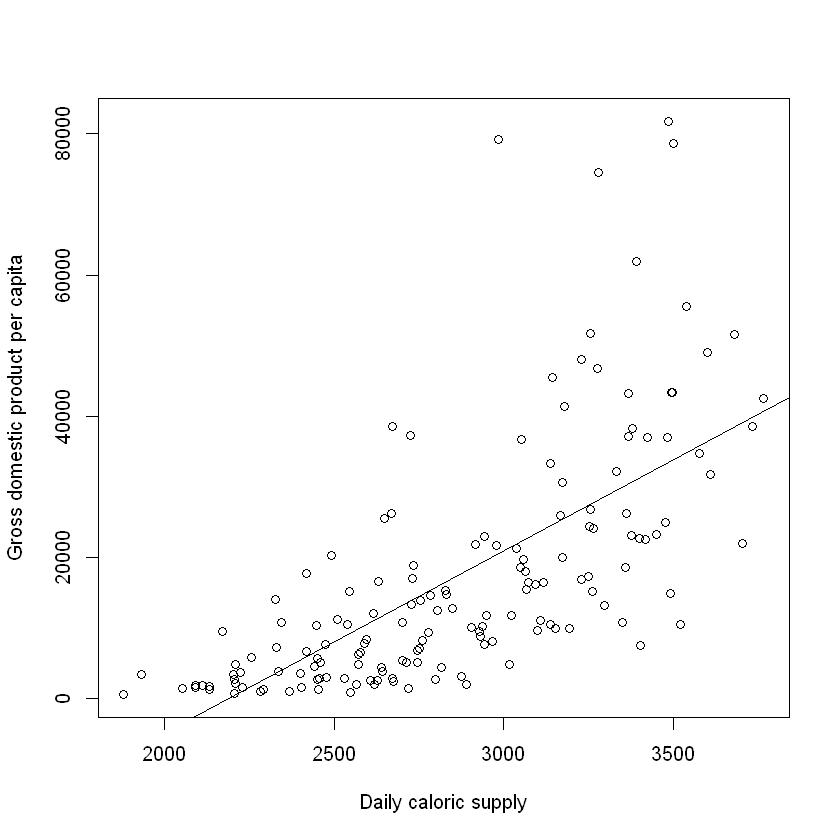

In [22]:
dcs <- lm(GDP.per.capita~DCS,data = food)
summary(dcs)
plot(food$DCS, food$GDP.per.capita,
    xlab = "Daily caloric supply", ylab = "Gross domestic product per capita",
    col = "black")
abline(dcs)

Through the output, we can get the prediction equation:<br>
***GDP Per Capita(hat) = -56329.687 + 25.747 × Daily caloric supply***<br>
We can see that the regression coefficient is 25.747, which is significantly not zero, which indicates that for every additional 1 unit of Daily caloric supply, GDP per capita is expected to increase by 25.747 units. Multiple R-squared is 0.4523, which shows that the model can explain the variance of 45.23% of GDP per capita. The residual standard error is 12640, which can be considered the average error of the model using Daily caloric supply to predict GDP per capita.

From the plot we can tell that this is a moderate, positive linear.


Second, we want to use the Population to predict GDP per capita.


Call:
lm(formula = GDP.per.capita ~ Population, data = food)

Residuals:
   Min     1Q Median     3Q    Max 
-16536 -12560  -5631   5819  64622 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.717e+04  1.402e+03  12.248   <2e-16 ***
Population  -5.239e-06  8.764e-06  -0.598    0.551    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 16940 on 156 degrees of freedom
  (50 observations deleted due to missingness)
Multiple R-squared:  0.002285,	Adjusted R-squared:  -0.00411 
F-statistic: 0.3573 on 1 and 156 DF,  p-value: 0.5509


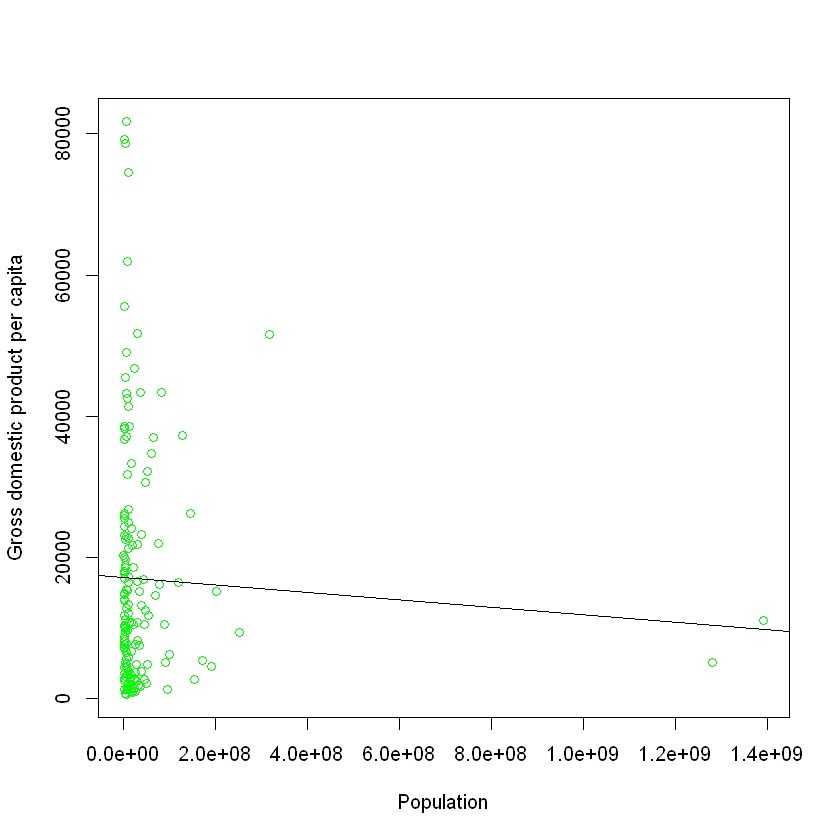

In [34]:
population <- lm(GDP.per.capita~Population,data = food)
summary(population)
plot(food$Population, food$GDP.per.capita,
    xlab = "Population", ylab = "Gross domestic product per capita",
    col = "green")
abline(population)

Through the output, we can get the prediction equation:
GDP Per Capita(hat) = 1.717e - 5.239e-06 × population
We can see that the regression coefficient is -5.239e-06, which indicates that for every additional 1 unit of population, GDP per capita is expected to goes down by 5.239e-06 units. Multiple R-squared is 0.002285, which shows that the model can explain the variance of 0.2285% of GDP per capita. The residual standard error is 16940, which can be considered the average error of the model using Population to predict GDP per capita.

From the plot we can tell that this is a none relation negative linear.

Next, we want to use the Daily fat supply to predict GDP per capita


Call:
lm(formula = GDP.per.capita ~ DFS, data = food)

Residuals:
   Min     1Q Median     3Q    Max 
-21005 -10959  -5131   5681  65405 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  7607.15    3575.70   2.127  0.03494 * 
DFS           109.36      38.16   2.866  0.00473 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 16650 on 157 degrees of freedom
  (49 observations deleted due to missingness)
Multiple R-squared:  0.04972,	Adjusted R-squared:  0.04367 
F-statistic: 8.214 on 1 and 157 DF,  p-value: 0.004727


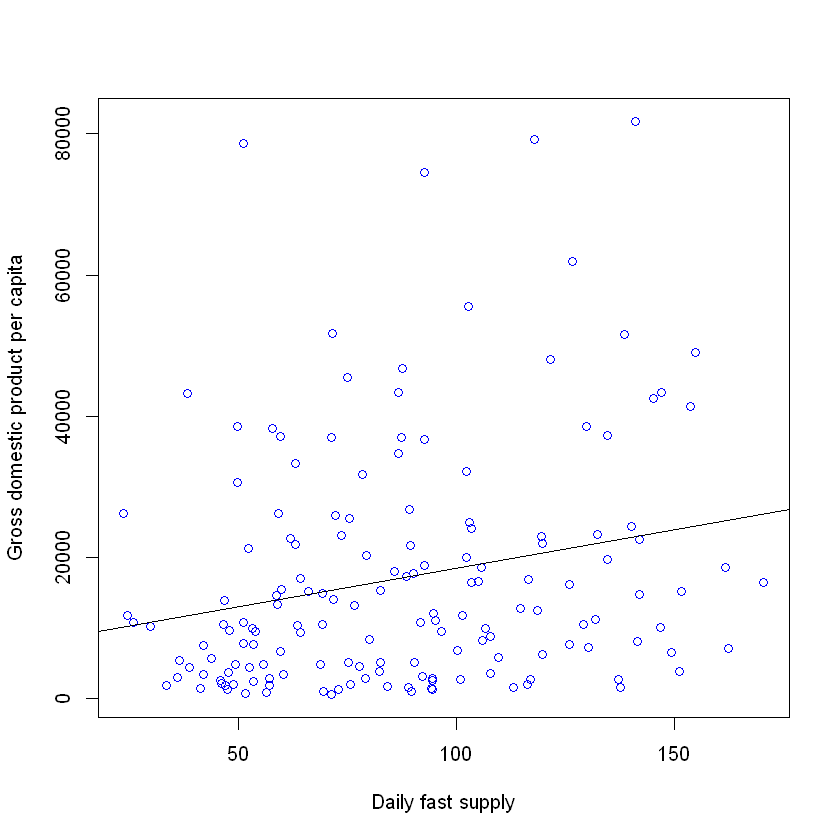

In [23]:
dfs <- lm(GDP.per.capita~DFS,data = food)
summary(dfs)
plot(food$DFS, food$GDP.per.capita,
    xlab = "Daily fast supply", ylab = "Gross domestic product per capita",
    col = "blue")
abline(dfs)

Through the output, we can get the prediction equation:<br>
***GDP Per Capita(hat) = 7607.15 + 109.36 × Daily fat supply***<br>
We can see that the regression coefficient is 109.36, which is significantly not zero, which indicates that for every additional 1 unit of Daily fat supply, GDP per capita is expected to increase by 109.36 units. Multiple R-squared is 0.04972, which shows that the model can explain the variance of 4.97% of GDP per capita. The residual standard error is 16650, which can be considered the average error of the model using Daily fat supply to predict GDP per capita.

From the plot we can tell that this is a moderate, positive linear.


Then, we want to use the Daily Protein supply to predict GDP per capita.


Call:
lm(formula = GDP.per.capita ~ DPS, data = food)

Residuals:
   Min     1Q Median     3Q    Max 
-20124 -12070  -5022   4830  63198 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  6627.22    5770.07   1.149   0.2525  
DPS           130.00      69.46   1.871   0.0631 .
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 16890 on 157 degrees of freedom
  (49 observations deleted due to missingness)
Multiple R-squared:  0.02182,	Adjusted R-squared:  0.01559 
F-statistic: 3.503 on 1 and 157 DF,  p-value: 0.06314


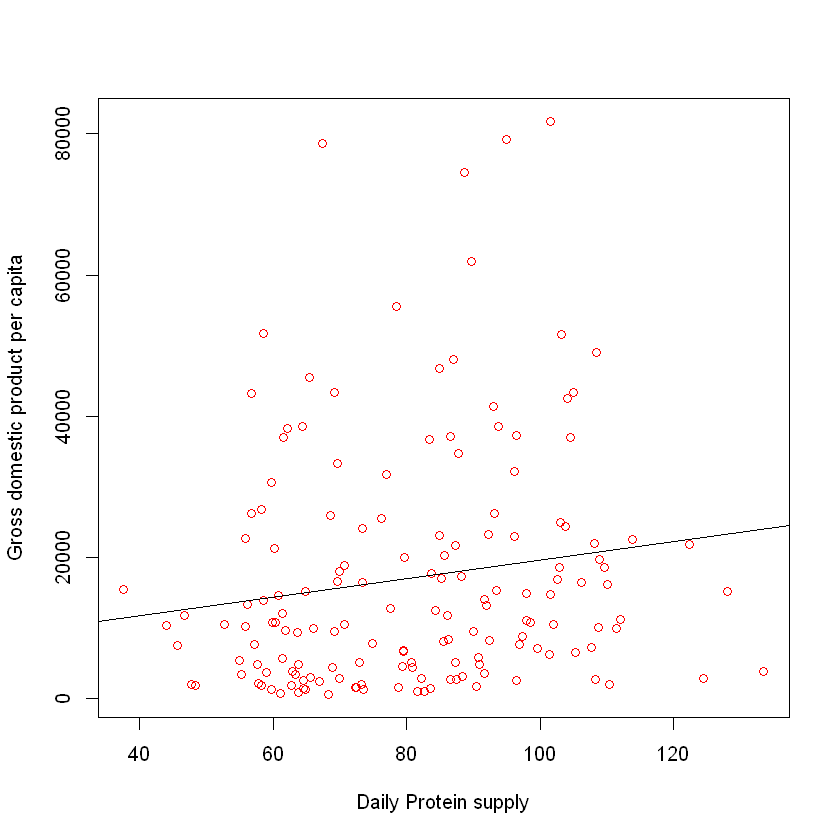

In [24]:
dps <- lm(GDP.per.capita~DPS,data = food)
summary(dps)
plot(food$DPS, food$GDP.per.capita,
    xlab = "Daily Protein supply", ylab = "Gross domestic product per capita",
    col = "red")
abline(dps)

Through the output, we can get the prediction equation:<br>
***GDP Per Capita(hat) = 6627.22 + 130 × Daily Protein supply***<br>
We can see that the regression coefficient is 130 , which is significantly not zero, which indicates that for every additional 1 unit of Daily Protein supply, GDP per capita is expected to increase by 130 units. Multiple R-squared is 0.02182, which shows that the model can explain the variance of 2.18% of GDP per capita. The residual standard error is 16890, which can be considered the average error of the model using Daily Protein supply to predict GDP per capita.

From the plot we can tell that this is a moderate, positive linear.

Last, we want to use the Meat food supply to predict GDP per capita.


Call:
lm(formula = GDP.per.capita ~ MFS, data = food)

Residuals:
   Min     1Q Median     3Q    Max 
-19408 -11898  -4816   7127  64280 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 12354.86    2591.99   4.767 4.24e-06 ***
MFS            94.76      44.08   2.150   0.0331 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 16840 on 157 degrees of freedom
  (49 observations deleted due to missingness)
Multiple R-squared:  0.02859,	Adjusted R-squared:  0.02241 
F-statistic: 4.621 on 1 and 157 DF,  p-value: 0.03311


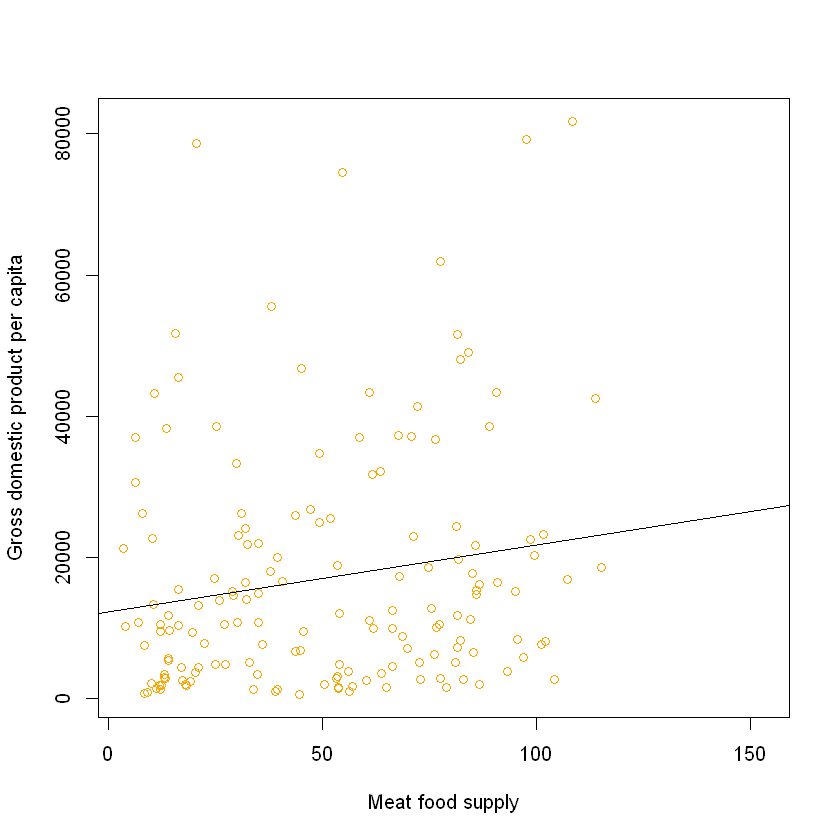

In [28]:
mfs <- lm(GDP.per.capita~MFS,data = food)
summary(mfs)
plot(food$MFS, food$GDP.per.capita,
    xlab = "Meat food supply", ylab = "Gross domestic product per capita",
    col = "orange")
abline(mfs)

Through the output, we can get the prediction equation:<br>
***GDP Per Capita(hat) = 12354.86 + 94.76 × Meat food supply***<br>
We can see that the regression coefficient is 94.76 , which is significantly not zero, which indicates that for every additional 1 unit of Meat food supply, GDP per capita is expected to increase by 94.76 units. Multiple R-squared is 0.02859, which shows that the model can explain the variance of 2.86% of GDP per capita. The residual standard error is 16840, which can be considered the average error of the model using Meat food supply to predict GDP per capita.

From the plot we can tell that this is a moderate, positive linear.

### Summary for Simple Linear Regression

From the above four sets of data analysis, we can see that GDP per capita and Daily caloric supply are the most closely related. It has highest Multiple R-squared and Adjusted R-squared values. Furthermore, the trend line has the highest slope in the plot.

## 9.Multiple Linear Regression

we can also use Multiple Linear Regression.


Call:
lm(formula = GDP.per.capita ~ ASP + DCS + DFS + DPS + MFS + Population, 
    data = proj)

Residuals:
   Min     1Q Median     3Q    Max 
-23428  -8010  -2285   4329  55896 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -4.807e+04  8.037e+03  -5.981 1.56e-08 ***
ASP         -2.374e+02  1.645e+02  -1.443    0.151    
DCS          2.448e+01  2.467e+00   9.920  < 2e-16 ***
DFS          2.575e+01  5.862e+01   0.439    0.661    
DPS         -8.779e+01  8.769e+01  -1.001    0.318    
MFS          4.023e+01  6.340e+01   0.635    0.527    
Population  -5.883e-06  6.562e-06  -0.897    0.371    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 12590 on 150 degrees of freedom
  (51 observations deleted due to missingness)
Multiple R-squared:  0.4689,	Adjusted R-squared:  0.4477 
F-statistic: 22.08 on 6 and 150 DF,  p-value: < 2.2e-16


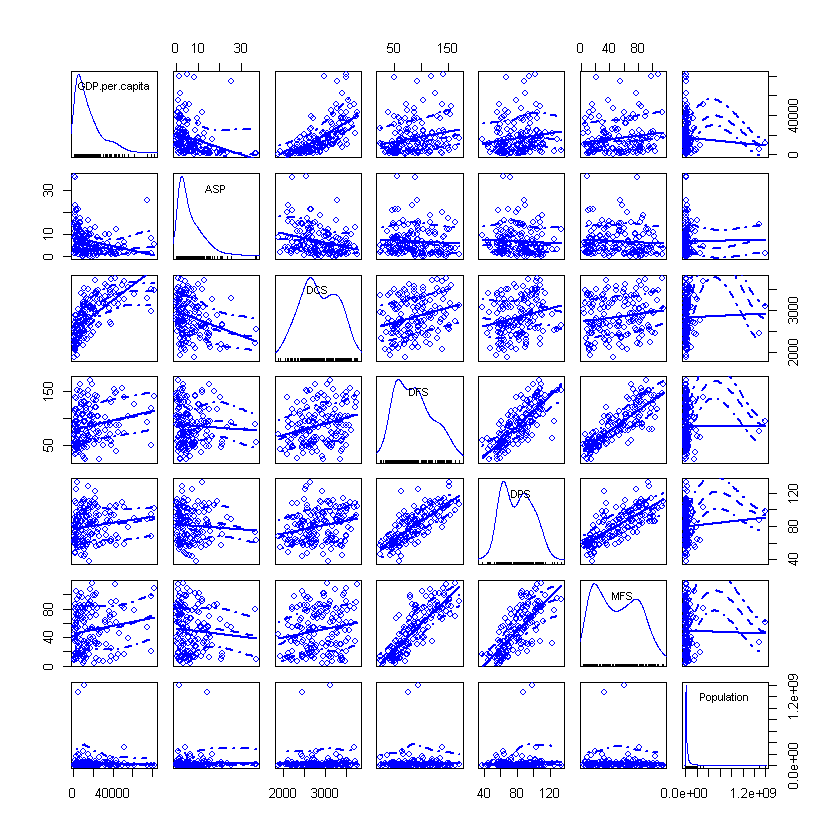

In [30]:
proj <- as.data.frame(food[,c("GDP.per.capita","ASP","DCS","DFS","DPS","MFS","Population")])
fit<- lm(GDP.per.capita~ASP+DCS+DFS+DPS+MFS+Population,
        data = proj)
summary(fit)
library(car)
scatterplotMatrix(proj)

As we can see, our R^2 value is 0.4689, which means that predictors explain 46.89% of the variability in GDP per capita. Now our adjusted R-squared is a little lower, obviously as we are using seven variables to predict. This could improve if there are one or more predictors that are not very good and are hurting our model. We can also see that using DCS to predict GDP per capita is the best, which is the same as our simple linear regression above.MFS's regression coefficient is 4.023, which means that when other variables remain the same, MFS rises by 1%, and GDP per capita will rise by 4.023%. Therefore, to increase domestic per capita GDP, we may eat more meat from now on and increase our calorie and fat intake!

## 10.Project Report

There is a strong correlation between per capita food supply and prosperity. It grows not only between countries but also with the prosperity of the country over time. As we have studied, daily calories, protein, and fat supply affect GDP per capita. We find that per capita supply is closely related to prosperity. As we get richer, per capita supply tends to increase. This is especially true for income growth from low-and middle-income to medium-to-high income. In recent years, we have seen overall stagnation or, in some cases, a decline in per capita supply in many high-income countries. For example, if we look at the data, we can learn about the latest trends in calories and protein in the United States, France, the United Kingdom, and Japan, and we will find that per capita intake is typically stable or declining. The same is true of per capita fat supply in some high-income countries, although the impact of this smoothness is not apparent.

We analyze the relationship between six variables and GDP per capita, and we find that the average per capita supply of pulses, Daily Protein supply, Total population is inversely proportional to GDP per capita. On the contrary, Daily caloric supply, Daily fat supply, Meat food supply is proportional to per capita GDP, of which Meat food supply rises by 1% and per capita GDP will rise by 4.023%. Also, using Daily caloric supply to predict GDP per capita is the best model.


In summary, per capita, food supply tends to increase with economic growth, but at high-income levels, this growth begins to slow and, in most cases, begins to level off (or even decline) with further growth.

## 11. Originality

The similarly published work for linear regression was found with the same dataset, but the similarly published work did not provide the best linear regression model to analyze food supply and GDP. They looked at the overall relationship between food supply and GDP; instead, we focused on which variable influenced and impacted a country’s GDP more.